#  Importing  libearies 

In [4]:
# import nessasery libearies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


# Importing data

In [5]:
bike_df = pd.read_csv('day.csv')

# Reading and understanding data

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
bike_df.shape

(730, 16)

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# check null value
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 no null values

# Duplicate Values

In [12]:
bike_df_copy = bike_df.copy()

In [13]:
bike_df_copy.shape

(730, 16)

In [14]:
bike_df_copy.drop_duplicates(inplace=True)

In [15]:
bike_df_copy.shape

(730, 16)

no duplicate values

In [15]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

# Data cleaning

In [16]:
# droping unwanted columns 
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [17]:
bike_df.shape

(730, 12)

# EDA

In [18]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [20]:
bike_df.mnth = bike_df.mnth.map({1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [21]:
bike_df.weekday = bike_df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu',5:'fri', 6:'sat'})

In [22]:
bike_df.weathersit = bike_df.weathersit.map({1:'Clear', 2: 'Mist',3: 'Light Snow', 4: 'Heavy Snow'})

In [23]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Univariate Analysis

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [25]:
cat_cols=['season','mnth', 'weekday', 'weathersit']
cont_cols=["yr","holiday","workingday","temp","atemp","hum","windspeed"]
target=["cnt"]
len(cat_cols)+len(cont_cols)+len(target)

12

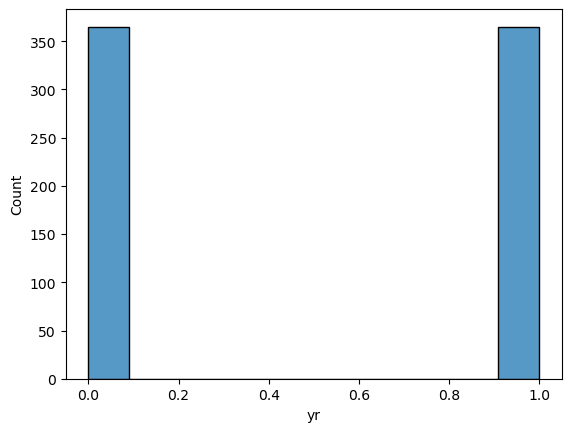

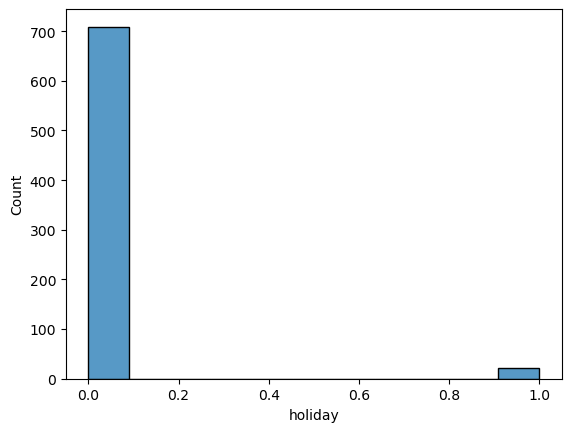

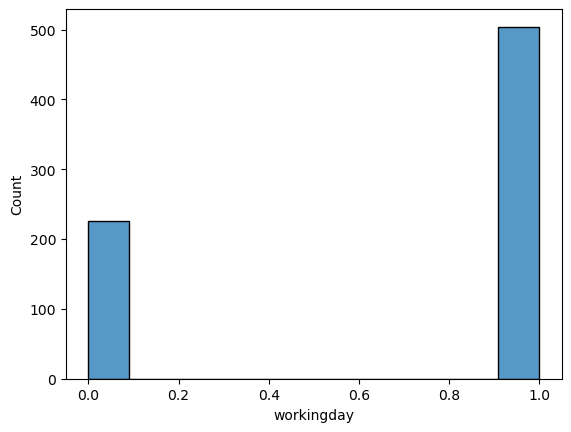

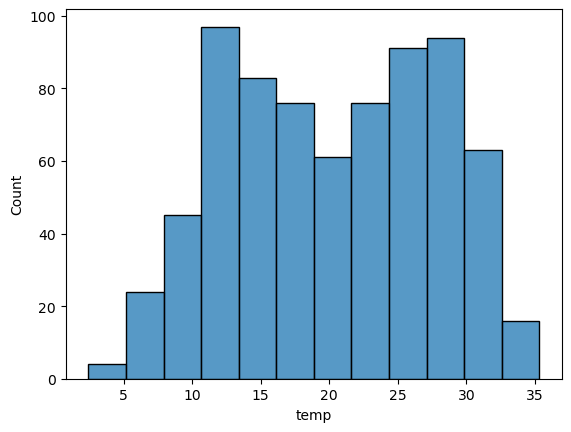

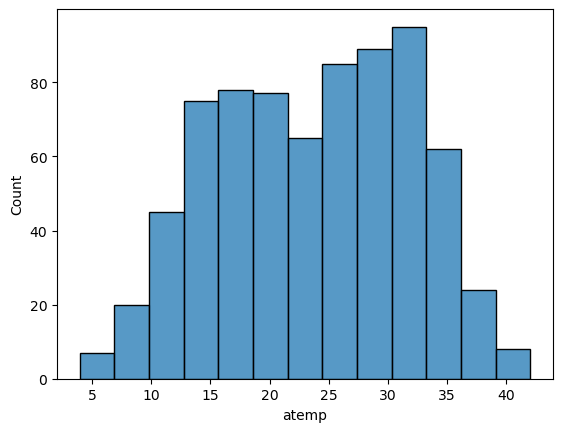

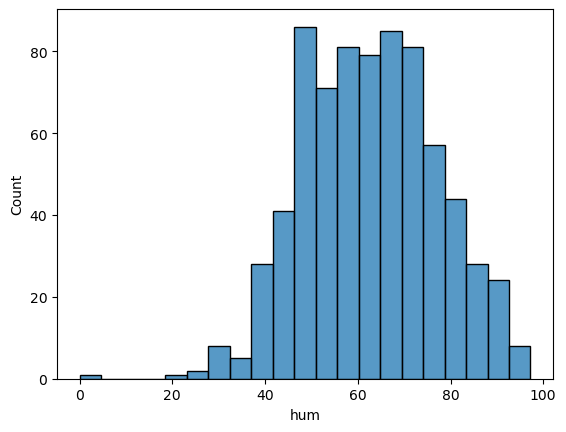

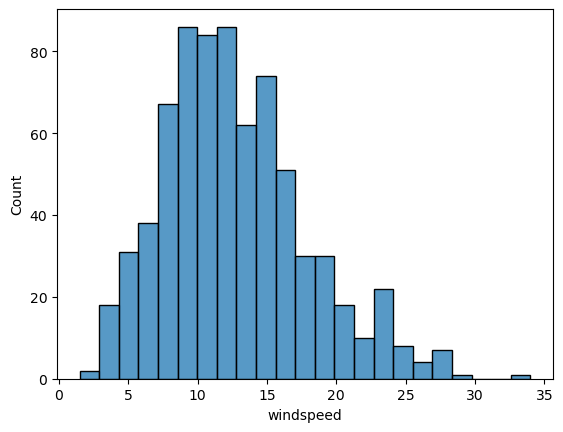

In [26]:
for i in cont_cols:
    sns.histplot(x=bike_df[i])
    plt.show()

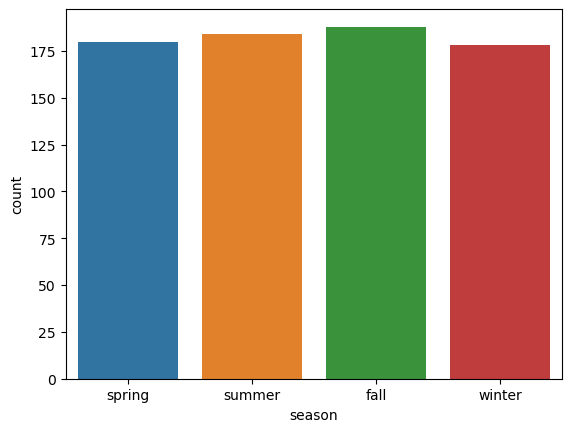

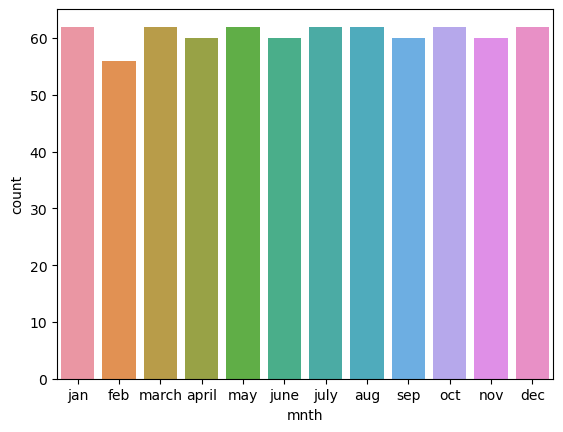

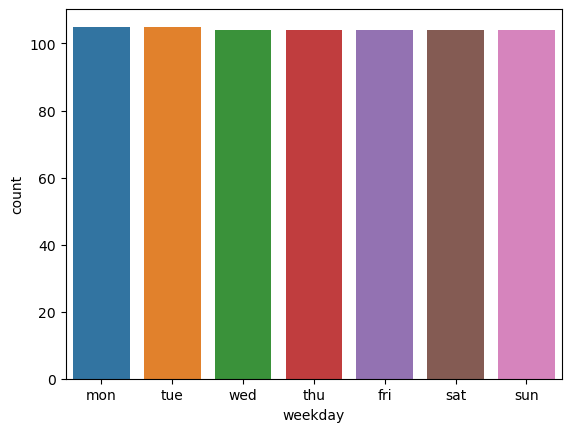

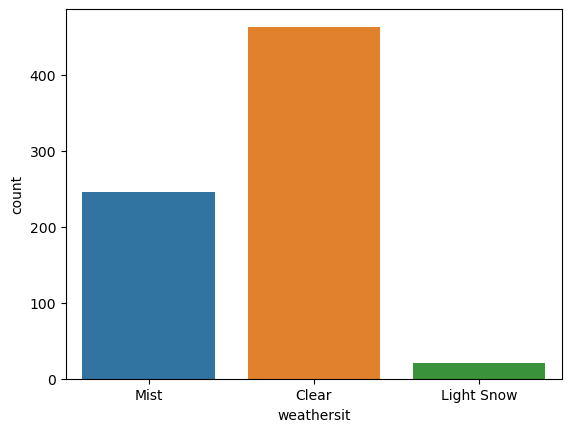

In [27]:
for i in cat_cols:
    sns.countplot(x=bike_df[i])
    plt.show()

## Bivariate Analysis

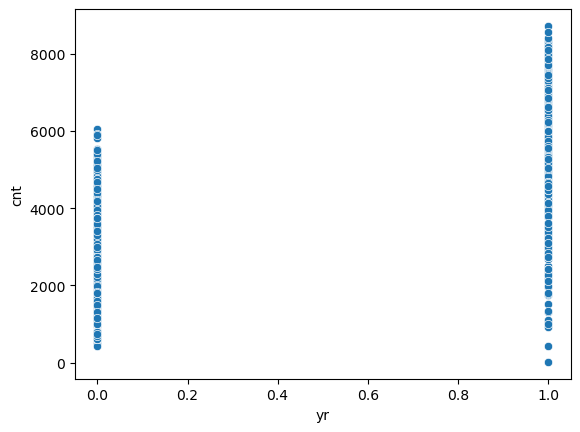

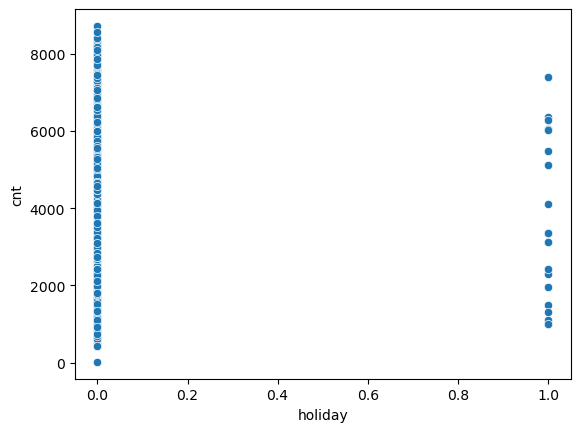

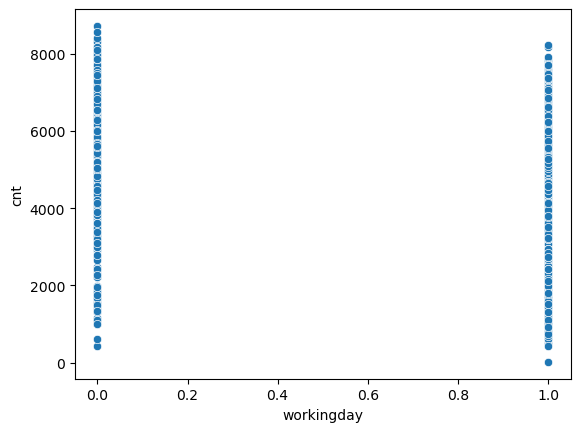

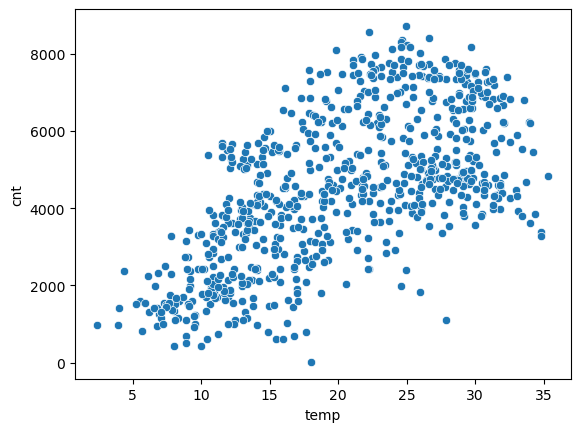

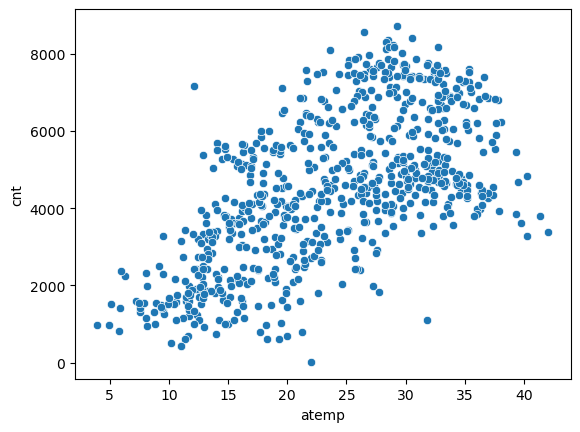

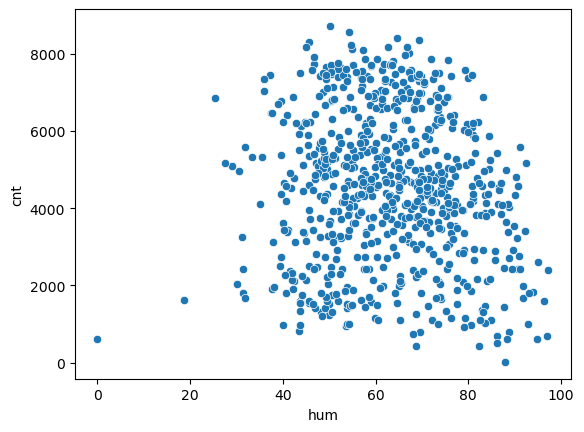

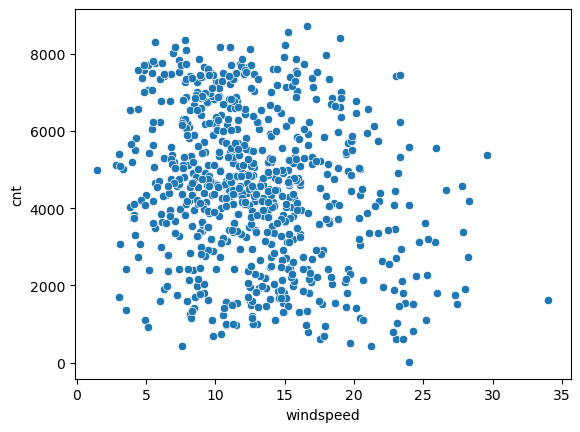

In [28]:
for i in cont_cols:
    sns.scatterplot(x=bike_df[i],y=bike_df["cnt"])
    plt.show()

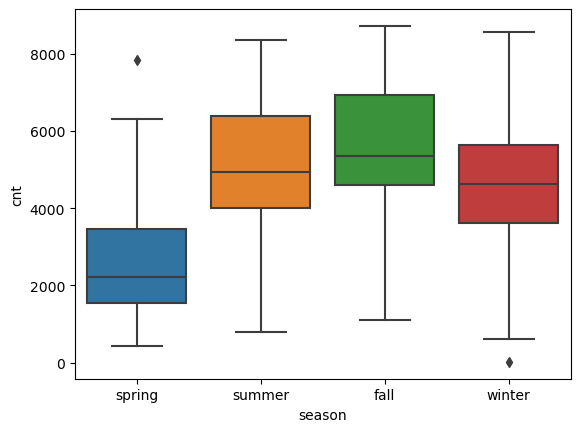

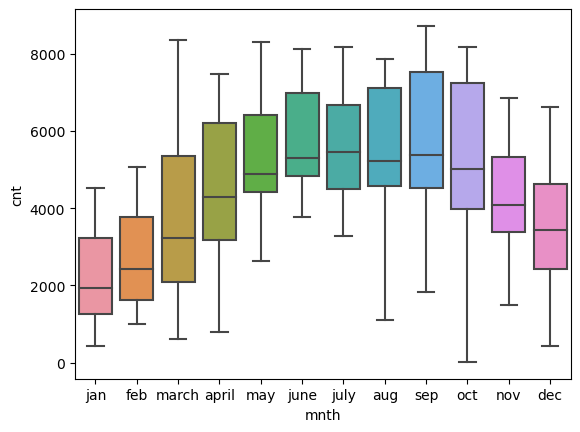

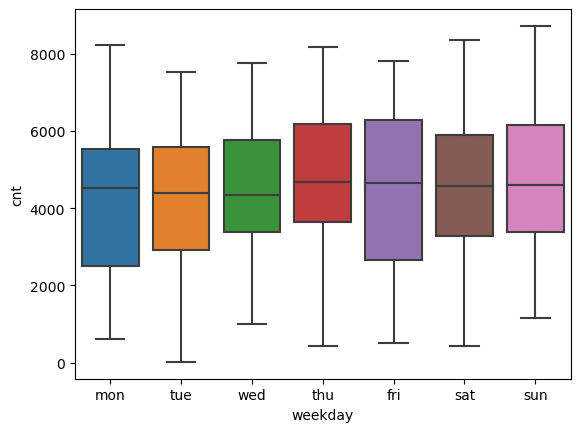

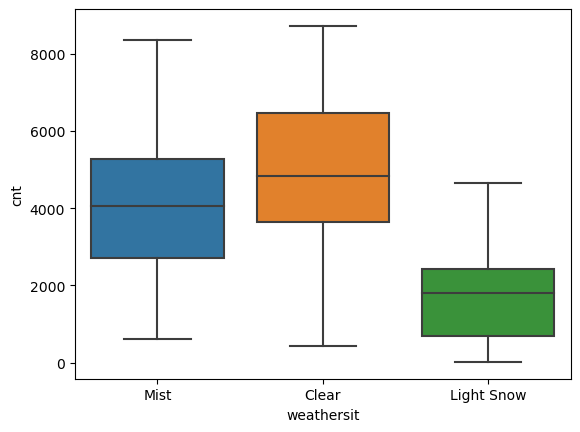

In [29]:
for i in cat_cols:
    sns.boxplot(x=bike_df[i],y=bike_df["cnt"])
    plt.show()

## Multivariate Analysis

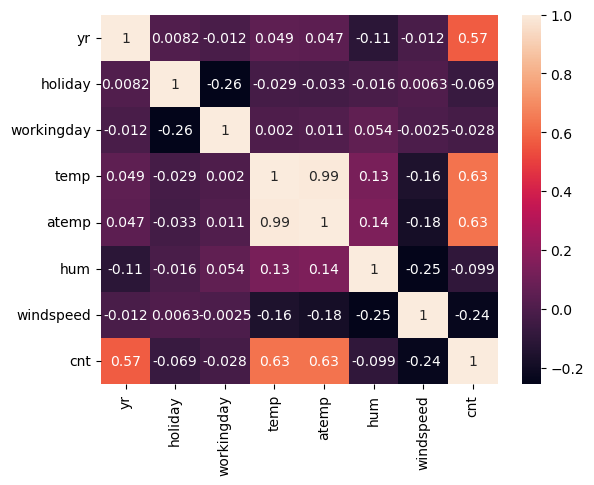

In [30]:
cor=bike_df.corr()
sns.heatmap(bike_df.corr(),annot = True)
plt.show()

In [31]:
Bike_numeric_var = bike_df.select_dtypes(include=['float64'])
Bike_numeric_var.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


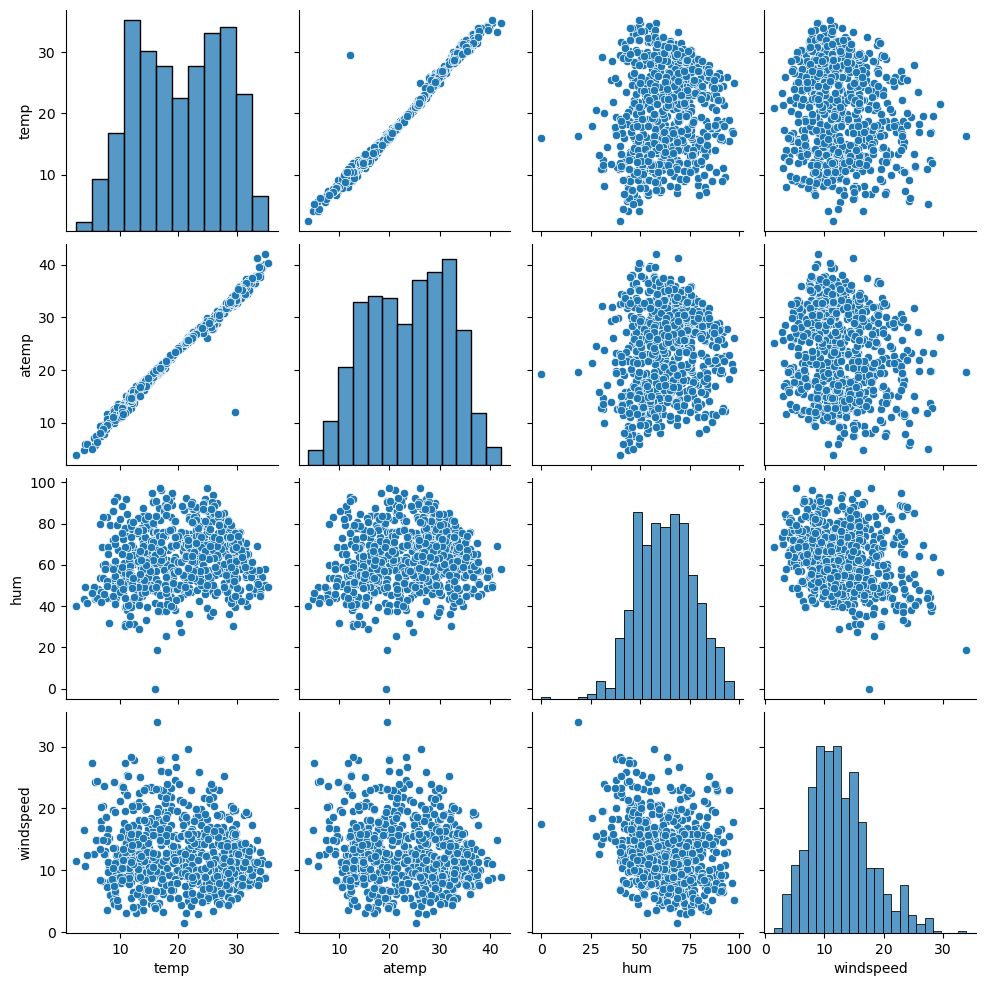

In [32]:
# Pairwise Scatter Plot
sns.pairplot(Bike_numeric_var)
plt.show()

# Pre-processing Steps

## dumy variable

In [33]:
bike_df.nunique()# Only for non binary categorical columns

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [34]:
season_df=pd.get_dummies(bike_df.season,drop_first=True)

mnth_df=pd.get_dummies(bike_df.mnth,drop_first=True)

weekday_df=pd.get_dummies(bike_df.weekday,drop_first=True)

weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)

In [35]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
df_new_bike = pd.concat([bike_df,season_df, mnth_df, weekday_df, weathersit_df], axis=1)

In [37]:
df_new_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  july        730 non-null    u

In [39]:
df_new_bike.drop(['season', 'mnth', 'weekday', 'weathersit'],axis=1, inplace=True)

In [40]:
df_new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_new_bike.shape

(730, 30)

In [42]:
df_new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  march       730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

# Train-Test Split

In [43]:
# train and tezt split with raindom state

np.random.seed(0)
df_train, df_test = train_test_split(df_new_bike, train_size = 0.70, test_size = 0.30, random_state = 333)


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  aug         510 non-null    uint8  
 12  dec         510 non-null    uint8  
 13  feb         510 non-null    uint8  
 14  jan         510 non-null    uint8  
 15  july        510 non-null    uint8  
 16  june        510 non-null    uint8  
 17  march       510 non-null    uint8  
 18  may         510 non-null    uint8  
 19  nov         510 non-null   

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    int64  
 8   spring      219 non-null    uint8  
 9   summer      219 non-null    uint8  
 10  winter      219 non-null    uint8  
 11  aug         219 non-null    uint8  
 12  dec         219 non-null    uint8  
 13  feb         219 non-null    uint8  
 14  jan         219 non-null    uint8  
 15  july        219 non-null    uint8  
 16  june        219 non-null    uint8  
 17  march       219 non-null    uint8  
 18  may         219 non-null    uint8  
 19  nov         219 non-null    

In [46]:
df_train.shape

(510, 30)

In [47]:
df_test.shape

(219, 30)

In [48]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
22,0,0,1,3.957390,4.941955,43.6522,16.522200,986,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,0,1,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,33.722500,39.519800,57.3750,8.417143,4672,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,25.454153,29.198350,53.0417,17.042589,7129,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,0,0,...,0,0,0,0,0,1,0,0,0,1


In [48]:
#X.columns = X.columns.astype(str)

# Scaling

In [50]:
scaler = MinMaxScaler()

In [51]:
num_vars = ['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,4499.627451,0.24902,0.247059,...,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,1949.447686,0.43287,0.431725,...,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,3146.500000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,4510.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,5983.500000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
483,1,0,1,0.497426,0.487055,0.609956,0.194850,6304,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,7109,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,4266,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,3786,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,822,1,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    int64  
 8   spring      219 non-null    uint8  
 9   summer      219 non-null    uint8  
 10  winter      219 non-null    uint8  
 11  aug         219 non-null    uint8  
 12  dec         219 non-null    uint8  
 13  feb         219 non-null    uint8  
 14  jan         219 non-null    uint8  
 15  july        219 non-null    uint8  
 16  june        219 non-null    uint8  
 17  march       219 non-null    uint8  
 18  may         219 non-null    uint8  
 19  nov         219 non-null    

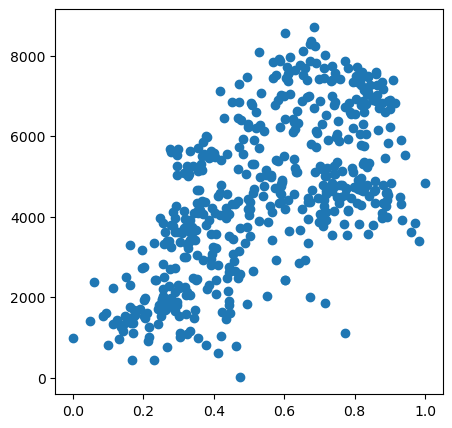

In [55]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [56]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [57]:
y_train.shape

(510,)

In [58]:
X_train.shape

(510, 29)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  aug         510 non-null    uint8  
 11  dec         510 non-null    uint8  
 12  feb         510 non-null    uint8  
 13  jan         510 non-null    uint8  
 14  july        510 non-null    uint8  
 15  june        510 non-null    uint8  
 16  march       510 non-null    uint8  
 17  may         510 non-null    uint8  
 18  nov         510 non-null    uint8  
 19  oct         510 non-null   

In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 483 to 366
Series name: cnt
Non-Null Count  Dtype
--------------  -----
510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


# Modelling

## RFE

In [61]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 6),
 ('jan', False, 5),
 ('july', True, 1),
 ('june', False, 14),
 ('march', True, 1),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', False, 2),
 ('thu', False, 15),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [64]:
# to check which columns are selected after RFE

cols = X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'july', 'march', 'nov', 'sep', 'sat', 'Light Snow', 'Mist'],
      dtype='object')


In [65]:
# check which columns are not selected or droped after RFE

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'aug', 'feb', 'jan', 'june', 'may',
       'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [66]:
cols.shape

(15,)

## VIF

In [67]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
X_train_rfe = X_train[cols]

In [69]:
X_train_rfe.shape

(510, 15)

In [71]:
calculateVIF(X_train_rfe)

,Features,VIF
1,temp,358.02
2,atemp,354.51
3,hum,22.80
4,windspeed,5.11
6,winter,2.75
5,spring,2.68
14,Mist,2.27
0,yr,2.05
10,nov,1.83
8,july,1.42


## Model 1

In [72]:
# building LR model 

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.78e-183
Time:                        14:39:28   Log-Likelihood:                -4124.0
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     494   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3158.9550    288.782     10.939      0.0

In [73]:
# droping atemp because high p valur and vif

X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

# caculTE VIF OR NEW MODEL

calculateVIF(X_train_new)

,Features,VIF
2,hum,22.37
1,temp,15.94
3,windspeed,4.99
5,winter,2.72
4,spring,2.67
13,Mist,2.26
0,yr,2.05
9,nov,1.83
7,july,1.42
6,dec,1.41


## Model 2

In [74]:
# secound LR model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.68e-184
Time:                        14:39:54   Log-Likelihood:                -4124.8
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     495   BIC:                             8343.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3188.6814    287.871     11.077      0.0

In [75]:
# droping hum high vif and -ve cofficient 

X_train_new = X_train_new.drop(['hum'], axis = 1)

# caculTE VIF OR NEW MODEL

calculateVIF(X_train_new)

,Features,VIF
1,temp,5.21
2,windspeed,4.96
4,winter,2.35
0,yr,2.04
3,spring,1.89
8,nov,1.80
12,Mist,1.53
6,july,1.38
5,dec,1.34
7,march,1.22


## Model 3

In [76]:
# building LR model 

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.64e-181
Time:                        14:41:53   Log-Likelihood:                -4134.2
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2383.6723    222.685     10.704      0.0

In [77]:
# droping windspeed -ve coffecient

X_train_new = X_train_new.drop(['windspeed'], axis = 1)

# caculate VIF on new model

calculateVIF(X_train_new)

,Features,VIF
1,temp,2.96
3,winter,2.34
0,yr,2.03
7,nov,1.75
11,Mist,1.53
2,spring,1.43
5,july,1.35
4,dec,1.34
6,march,1.22
8,sep,1.21


## Model 4

In [78]:
# building LR model 

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          4.54e-176
Time:                        14:41:56   Log-Likelihood:                -4149.8
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     497   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1814.6128    204.192      8.887      0.0

In [79]:
# droping spring negtaive coefficient 

X_train_new = X_train_new.drop(['spring'], axis = 1)

# caculate VIF on new model

calculateVIF(X_train_new)

,Features,VIF
1,temp,2.96
2,winter,2.23
0,yr,1.94
6,nov,1.74
10,Mist,1.49
4,july,1.33
3,dec,1.27
7,sep,1.20
8,sat,1.18
5,march,1.11


## Model 5

In [80]:
# building LR model 

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     178.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          7.67e-165
Time:                        14:41:59   Log-Likelihood:                -4179.2
No. Observations:                 510   AIC:                             8382.
Df Residuals:                     498   BIC:                             8433.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        579.2192    136.018      4.258      0.0

In [81]:
# droping sat high P value  

X_train_new = X_train_new.drop(['sat'], axis = 1)

# caculate VIF on new model

calculateVIF(X_train_new)

,Features,VIF
1,temp,2.86
2,winter,2.23
0,yr,1.94
6,nov,1.74
9,Mist,1.48
4,july,1.33
3,dec,1.27
7,sep,1.20
5,march,1.10
8,Light Snow,1.05


## Model 6

In [82]:
# building LR model 

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     195.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.99e-165
Time:                        14:42:04   Log-Likelihood:                -4181.0
No. Observations:                 510   AIC:                             8384.
Df Residuals:                     499   BIC:                             8430.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        589.3485    136.246      4.326      0.0

In [83]:
lr_6.params

const          589.348511
yr            1978.992517
temp          5418.647779
winter        1185.440580
dec           -376.880881
july          -469.237639
march          328.936896
nov           -359.275942
sep            559.094396
Light Snow   -2737.184780
Mist          -602.043080
dtype: float64

In [84]:
X_train_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   temp        510 non-null    float64
 3   winter      510 non-null    uint8  
 4   dec         510 non-null    uint8  
 5   july        510 non-null    uint8  
 6   march       510 non-null    uint8  
 7   nov         510 non-null    uint8  
 8   sep         510 non-null    uint8  
 9   Light Snow  510 non-null    uint8  
 10  Mist        510 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 19.9 KB


In [85]:
X_train_lm_6.head()

,const,yr,temp,winter,dec,july,march,nov,sep,Light Snow,Mist
483,1.0,1,0.497426,0,0,0,0,0,0,0,0
650,1.0,1,0.416433,1,0,0,0,0,0,0,0
212,1.0,0,0.887856,0,0,0,0,0,0,0,0
714,1.0,1,0.378013,1,1,0,0,0,0,0,1
8,1.0,0,0.098690,0,0,0,0,0,0,0,0


# Error Terms

In [100]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

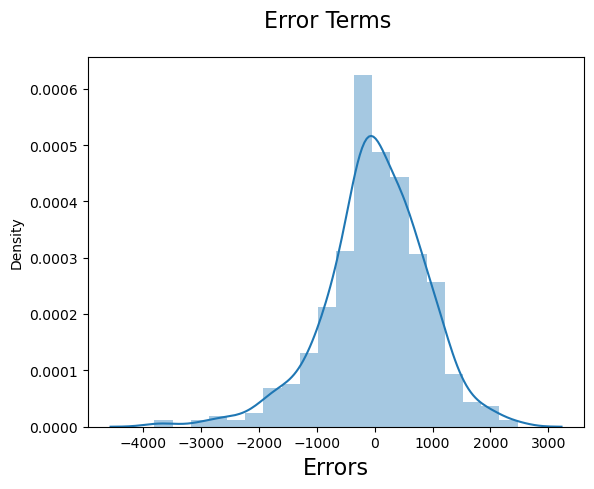

In [101]:
# Plot the histogram for error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 16) 
plt.xlabel('Errors', fontsize = 16)

# Multi Colinearity

In [86]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,2.86
2,winter,2.23
0,yr,1.94
6,nov,1.74
9,Mist,1.48
4,july,1.33
3,dec,1.27
7,sep,1.20
5,march,1.10
8,Light Snow,1.05


VIF is below 5 so their is no multi colinearity

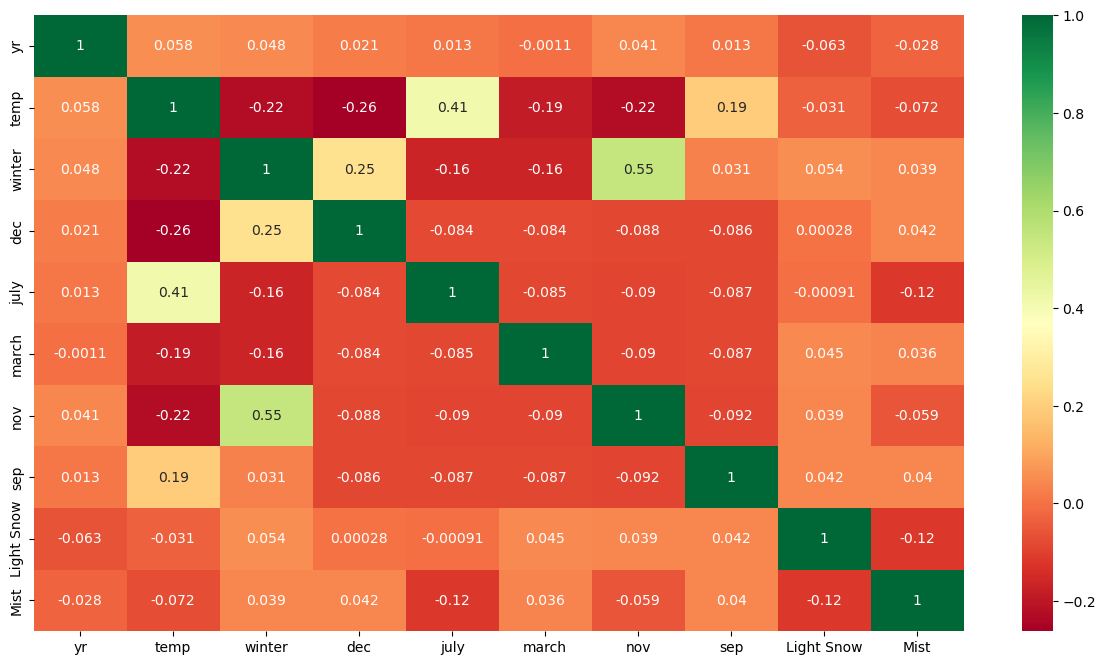

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Linearity


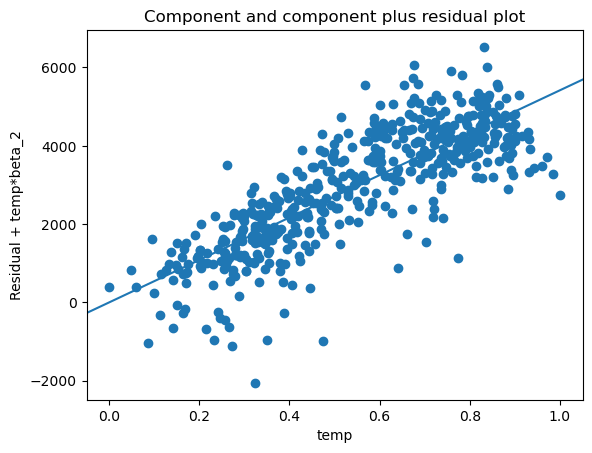

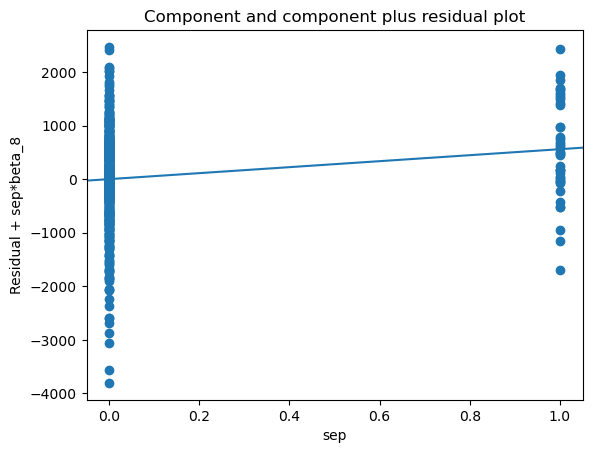

In [103]:
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()


## Homoscedasticity

##  Test data Scaling

In [88]:
num_vars

['temp', 'atemp', 'hum', 'windspeed']

In [89]:
# scaling in test data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
22,0,0,1,0.046591,0.025950,0.453529,0.462217,986,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,7460,0,1,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,4672,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,7129,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,3750,0,0,...,0,0,0,0,0,1,0,0,0,1


In [90]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,4532.182648,0.237443,0.264840,...,0.086758,0.082192,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.036530,0.324201
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,1911.832231,0.426491,0.442259,...,0.282125,0.275286,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,3192.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,4592.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,5905.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Test data modeling

In [91]:
# Building the Linear Model

y_test = df_test.pop('cnt')
X_test = df_test

In [92]:
col_1 = X_train_new.columns

X_test = X_test[col_1]

X_test_lm_6 = sm.add_constant(X_test)


In [93]:
y_pred = lr_6.predict(X_test_lm_6)

predict R^2

In [94]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)


0.793

# Model evaluation

Text(0, 0.5, 'y_pred')

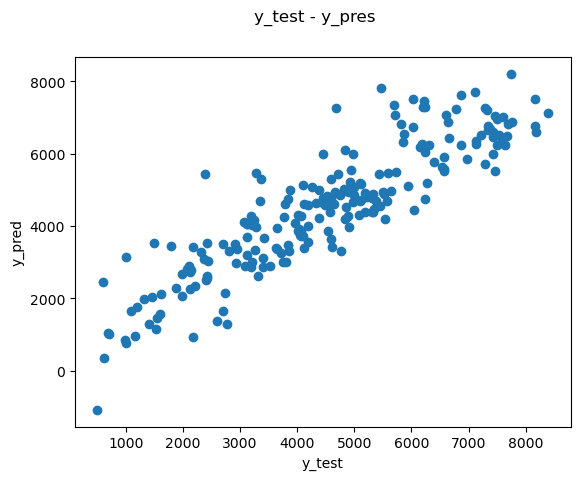

In [95]:
# Ploting between y_test and y_pred

plt.figure()
plt.scatter(y_test, y_pred)
plt.suptitle('y_test - y_pres')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [96]:
round(lr_6.params,4)

const          589.3485
yr            1978.9925
temp          5418.6478
winter        1185.4406
dec           -376.8809
july          -469.2376
march          328.9369
nov           -359.2759
sep            559.0944
Light Snow   -2737.1848
Mist          -602.0431
dtype: float64

In [97]:
#Adjusted-R^2 value for the test data

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.783


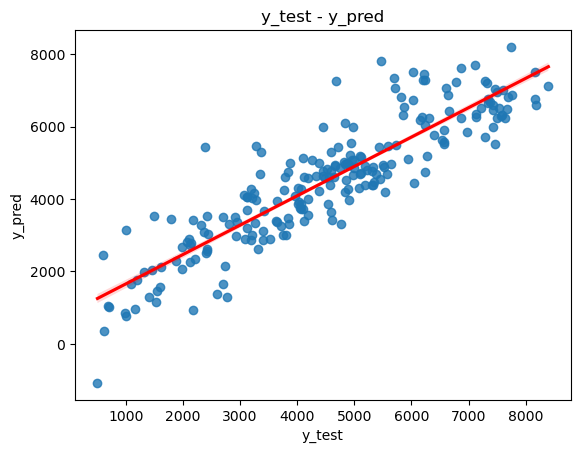

In [98]:
# test data fit check and ploting

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test - y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Train and Test comparision

###### Train r^2 value = 0.796
###### Test r^2 value = 0.793
###### Train adjusted r^2 value = 0.792
###### Test adjusted r^2 value = 0.783